# Es 1

In [100]:
# grad(f) = [-400 * x * (y - x ** 2) - 2 * (1 - x), 200 * (y - x ** 2)].T
# hess(f) = [
#   -400 * (y - 3 * x ** 2) + 2, -400 * x
#   -400 * x, 200
# ]
# l'unico punto stazionario è il punto (x, y) = (1, 1), il quale è un minimo assoluto --> f(1, 1) = 0

# Es 2

In [101]:
import matplotlib.pyplot as plt
import numpy as np

Early Stopping at epoch 12028


(array([0.99647605, 0.99295038]), 1.243820434720804e-05)

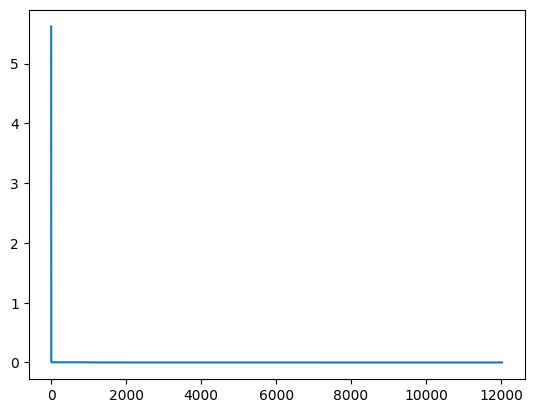

In [103]:
max_iter = range(50000)
tol = 1e-8
x_0 = np.array([-1.2, 1.2])
stepsize = 0.001
def func(vec):
    x, y = vec
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2
def grad(vec):
    x, y = vec
    return np.array([-400 * x * (y - x ** 2) - 2 * (1 - x), 200 * (y - x ** 2)])

w = x_0

err = list()
for i in max_iter:
    direct = -grad(w)
    w += stepsize * direct
    err.append(abs(func(w) - func(w - stepsize * direct)))
    if err[-1] <= tol:
        print(f"Early Stopping at epoch {i}")
        break
plt.plot(err); w, func(w)

# Es 3

In [104]:
H = np.array([[802, -400], [-400, 200]])
np.linalg.eigvals(H) # matrix positive definite

array([1.00160064e+03, 3.99360767e-01])

Early Stopping at epoch 8945


(array([0.99822025, 0.9965849 ]), 5.162137380706194e-06)

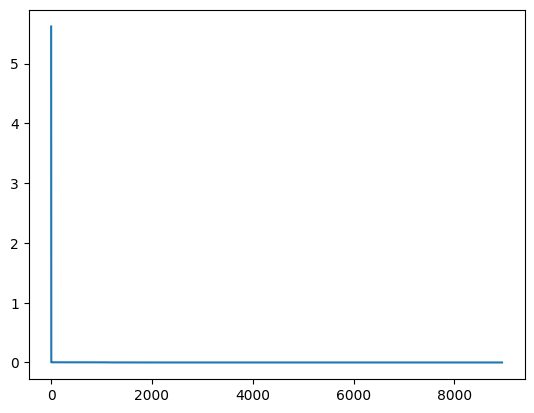

In [105]:
tol_near = 1e-5
w = np.array([-1.2, 1.2])

err = list()
newton = False
for i in max_iter:
    if newton:
        direct = - np.linalg.inv(H) @ grad(w)
    else:
        direct = -grad(w)
    newton = False
    w += stepsize * direct
    err.append(abs(func(w) - func(w - stepsize * direct)))
    if err[-1] <= tol_near:
        newton = True
    if err[-1] <= tol:
        print(f"Early Stopping at epoch {i}")
        break
plt.plot(err); w, func(w)